In [9]:
import numpy as np
from lattice import lattice_2D
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import normalize

In [10]:
Hexagonal_monolayer = lattice_2D(2,10,8)
Hexagonal_monolayer.set_position(
    r_a = np.array([1,0]),
    r_b = np.array([0.5,0.5*np.sqrt(3)]),
    r_site = np.array((
    [0.5,np.sqrt(3)/6] #first site
    ,[1,np.sqrt(3)/3] #second site
    ))
)
Hexagonal_monolayer.output_lattice_structure("Hexagonal_monolayer_structure.txt")
strcture=np.loadtxt("Hexagonal_monolayer_structure.txt")

(-0.15000000000000002, 14.15, -0.028867513459481298, 6.95707074373499)

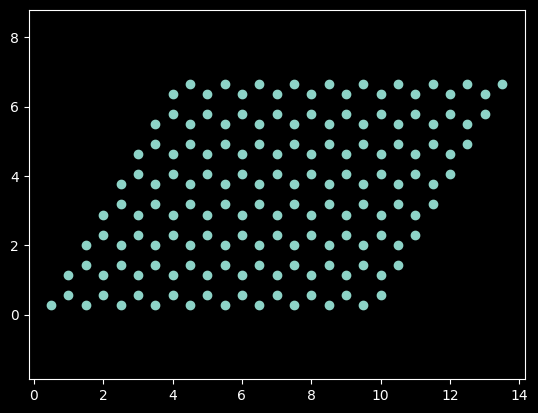

In [11]:
plt.style.use("dark_background")
plt.figure()
plt.scatter(strcture[:,3],strcture[:,4])
plt.axis("equal")

In [12]:
def initialRandomSpin(lattice:lattice_2D):
    """
        Initial particles
    """
    N=lattice.N
    sx=np.random.normal(0,1,N)
    sy=np.random.normal(0,1,N)
    sz=np.random.normal(0,1,N)
    spins = np.transpose(np.vstack((sx,sy,sz)))
    spins_normalized = normalize(spins)

    lattice.set_spins(spins_normalized)
    return lattice

In [15]:
def initial_AFM_ZigZagChain(lattice:lattice_2D):
    """
        Initial particles
    """
    N=lattice.N
    sx=np.zeros(N)
    for n in range(N):
        if lattice._tag[n,2]%2==0:
            sx[n]=1
        else:
            sx[n]=-1
    sy=np.zeros(N)
    sz=np.zeros(N)
    spins = np.transpose(np.vstack((sx,sy,sz)))
    spins_normalized = normalize(spins)

    lattice.set_spins(spins_normalized)
    return lattice

In [18]:
initial_AFM_ZigZagChain(Hexagonal_monolayer)
#initial_AFM_ZigZagChain(Hexagonal_monolayer)
Hexagonal_monolayer.output_spin_data("spin_data.txt",0)
spins = np.loadtxt("spin_data.txt")

<Figure size 640x480 with 0 Axes>

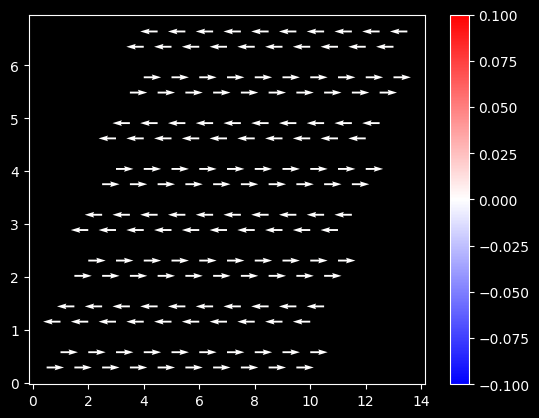

In [19]:
plt.style.use("dark_background")
plt.set_cmap('bwr')

fig, ax =plt.subplots()
line = ax.plot([],[])

x = strcture[:,3]
y = strcture[:,4]
sx = spins[:,0]
sy = spins[:,1]
sz = spins[:,2]


arrow_plot = ax.quiver(x,y,sx,sy,sz)
plt.colorbar(arrow_plot,ax=ax)


In [ ]:
from LLGS_simulation import LLGS_Simulation_2D

In [ ]:
sim = LLGS_Simulation_2D(Hexagonal_monolayer)
sim.setup(H_t=5,io_title='Hexagonal_monolayer',method='Euler')
sim.evolve(Hexagonal_monolayer,tmax=10)

In [ ]:
import scipy.sparse as sp

A = np.array([[1, 0, 2],
               [0, 3, 0]])

B = np.array([[4, 0],
               [0, 5],
               [6, 0]])

A = sp.csr_matrix(A)

B = sp.csr_matrix(B)

C = A.dot(B).toarray()


In [ ]:
np.cross(np.cross(np.array([0,0,1]),spins[0,:]),spins[0,:])

In [ ]:
def scipy_cal():
    sx = spins[:,0]
    sy = spins[:,1]
    sz = spins[:,2]
    identity = np.identity(len(sx))

    identity_sparse = sp.csr_array(identity)


    S_x_square = np.inner(sx,identity_sparse.dot(sx))
    S_y_square = np.inner(sy,identity_sparse.dot(sy))
    S_z_square = np.inner(sz,identity_sparse.dot(sz))
    S_x_square+S_y_square+S_z_square

In [ ]:
def numpy_cal():
    sx = spins[:,0]
    sy = spins[:,1]
    sz = spins[:,2]
    identity = np.identity(len(sx))


    S_x_square = np.inner(sx,identity.dot(sx))
    S_y_square = np.inner(sy,identity.dot(sy))
    S_z_square = np.inner(sz,identity.dot(sz))
    S_x_square+S_y_square+S_z_square

In [ ]:
%timeit scipy_cal()
%timeit numpy_cal()

In [ ]:
np.dot(sx,np.dot(identity,sx))

In [ ]:
S_x_square = np.tensordot(sx,np.tensordot(identity,sx,axes=(1,0)),axes=1).item()

In [20]:
a = np.array([0,1,2,3]).astype(np.int32)

In [24]:
b = np.amax(a)

In [25]:
b = -1

In [29]:
a = np.array([0,0,1,1,2,2,3,3,0,0,1,1,2,2,3,3])
print(a)
a = np.where(a == np.max(a),-1,a)
print(a)

[0 0 1 1 2 2 3 3 0 0 1 1 2 2 3 3]
[ 0  0  1  1  2  2 -1 -1  0  0  1  1  2  2 -1 -1]


In [30]:
from lattice import lattice_2D

In [31]:
SC = lattice_2D(1,4,3)

In [39]:
SC._positions

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [41]:
SC._spins

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [42]:
SC.set_spins(np.ones((12,3)))

In [43]:
SC._spins

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [44]:
SC.get_spins()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [45]:
SC.output_lattice_structure("SC.txt")

In [46]:
SC.set_position(r_a=(7,0),r_b=(0,3),r_site=(0,0))

In [47]:
SC.output_lattice_structure("SC_but_the_position_is_setted.txt")

In [48]:
hex_layer = lattice_2D(2,10,8)

In [49]:
hex_layer.set_position(r_a=np.array((1,0)),r_b=np.array((0.5,np.sqrt(3)/2)),r_site=np.array(([0.5,np.sqrt(3)/6],[1,np.sqrt(3)/3])))

In [52]:
x = hex_layer.get_positions()[:,0]
y = hex_layer.get_positions()[:,1]

In [53]:
import matplotlib.pyplot as plt

(-0.15000000000000002, 14.15, -0.028867513459481298, 6.95707074373499)

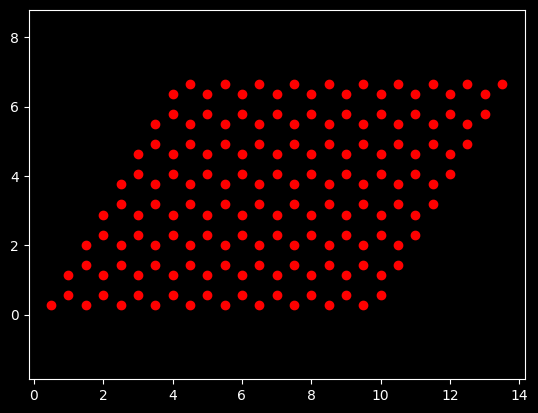

In [60]:
plt.plot(x,y,'ro')
plt.axis('equal')